<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">

Classify iris plants into three species <br><br>
using different models
<br><br>
</p>

In [295]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [259]:
data = pd.read_csv('./data/iris/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [260]:
data.shape

(150, 6)

In [261]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h2> Data Cleaning </h2>


<p> Dropping Id column </p>

In [262]:
data = data.drop('Id', axis=1)

<p> Checking for null values </p>

In [263]:
data.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

<p> No null values found. </p>

<h2> Analyzing </h2>
<p> Next counting the number of unique species </p>

In [264]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [265]:
data.groupby(['Species']).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


<p> So we have 3 species with 50 rows for each </p>

In [266]:
data[['Species', 'SepalLengthCm']].groupby('Species').mean().sort_values(by='SepalLengthCm')

,SepalLengthCm
Species,
Iris-setosa,5.006
Iris-versicolor,5.936
Iris-virginica,6.588


<p> So in general Iris-setosa has smaller Sepal Length. </p>

In [267]:
data[['Species', 'SepalWidthCm']].groupby('Species').mean().sort_values(by='SepalWidthCm')

,SepalWidthCm
Species,
Iris-versicolor,2.770
Iris-virginica,2.974
Iris-setosa,3.418


In [268]:
data[['Species', 'PetalLengthCm']].groupby('Species').mean().sort_values(by='PetalLengthCm')

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [269]:
data[['Species', 'PetalWidthCm']].groupby('Species').mean().sort_values(by='PetalWidthCm')

,PetalWidthCm
Species,
Iris-setosa,0.244
Iris-versicolor,1.326
Iris-virginica,2.026


<h2>Analyze by visualizing data</h2>

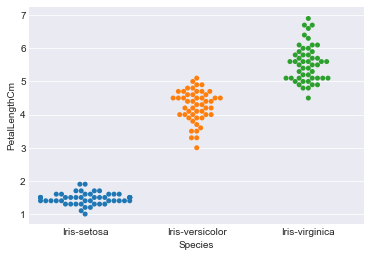

In [270]:
ax = sns.swarmplot(x="Species", y="PetalLengthCm", data=data)

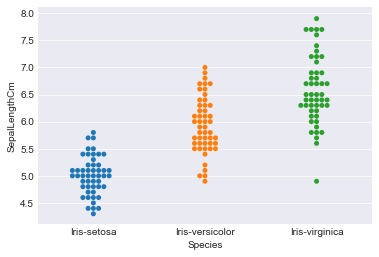

In [271]:
ax = sns.swarmplot(x="Species", y="SepalLengthCm", data=data)

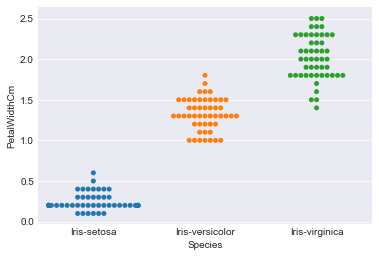

In [272]:
ax = sns.swarmplot(x="Species", y="PetalWidthCm", data=data)

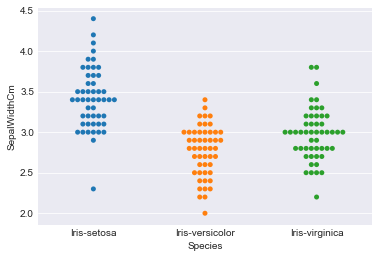

In [273]:
ax = sns.swarmplot(x="Species", y="SepalWidthCm", data=data)

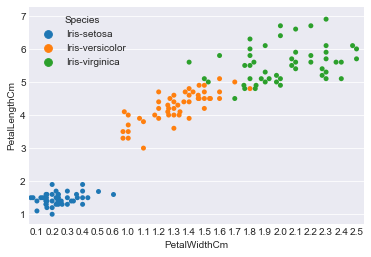

In [274]:
ax = sns.swarmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species", data=data)

<h4>Examining correlations among features </h4>

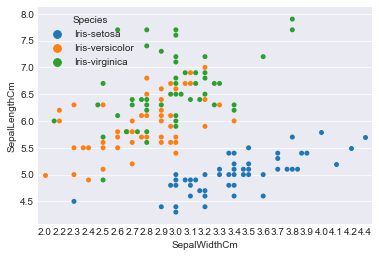

In [275]:
ax = sns.swarmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species", data=data)

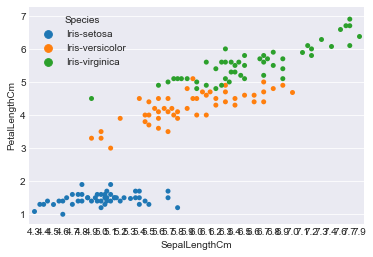

In [276]:
ax = sns.swarmplot(x="SepalLengthCm", y="PetalLengthCm", hue="Species", data=data)

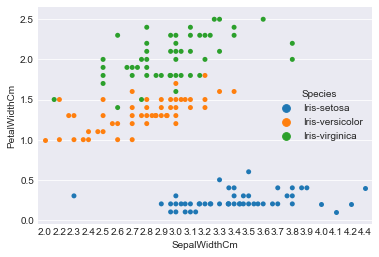

In [277]:
ax = sns.swarmplot(x="SepalWidthCm", y="PetalWidthCm", hue="Species", data=data)

<h3> Conclusions </h3>


<p> From the above plots we conclude the following: </p>
<ol>
<li> Iris-setosa < Iris-versicolor < Iris-virginica for petal lengths, sepal lengths , petal widths </li>
<li> Iris-setosa has a very high sepal width than the other two</li>
<li> Petal length is strongly correlated to petal width</li>
<li> No clear correlation between sepal width and length</li>
<li> Petal length and sepal length are related </li>
<li> Sepal width and petal width are weakly related </li>
</ol>
<p> We can also verify these analytically </p>

In [278]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<h2> Wrangle data </h2>

<p> Map species to numbers </p>

In [279]:
data['Species'] = data['Species'].map( {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} )

In [280]:
data['Species'].unique()

array([0, 1, 2], dtype=int64)

<h2> Split data into test and train sets </h2>

In [369]:
y = data['Species']
X = data.drop('Species', axis=1)

In [370]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [411]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = logreg.score(X_train, y_train) * 100
acc_log_test = logreg.score(X_test, y_test) * 100

In [412]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, y_train) * 100
acc_svc_test = svc.score(X_test, y_test) * 100

In [413]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, y_train) * 100
acc_knn_test = knn.score(X_test, y_test) * 100

In [414]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, y_train) * 100
acc_gaussian_test = gaussian.score(X_test, y_test) * 100

In [415]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = sgd.score(X_train, y_train) * 100
acc_sgd_test = sgd.score(X_test, y_test) * 100

In [416]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = linear_svc.score(X_train, y_train) * 100
acc_linear_svc_test = linear_svc.score(X_test, y_test) * 100

In [417]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, y_train) * 100
acc_decision_tree_test = decision_tree.score(X_test, y_test) * 100

In [418]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_train, y_train) * 100
acc_random_forest_test = random_forest.score(X_test, y_test) * 100

In [419]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree'],
    'Training set score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Training set score', ascending=False)

,Model,Training set score
3,Random Forest,100.0
7,Decision Tree,100.0
0,Support Vector Machines,98.0
1,KNN,95.0
4,Naive Bayes,95.0
6,Linear SVC,95.0
2,Logistic Regression,94.0
5,Stochastic Gradient Descent,67.0


In [420]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree'],
    'Test set score': [acc_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, 
              acc_sgd_test, acc_linear_svc_test, acc_decision_tree_test]})
models.sort_values(by='Test set score', ascending=False)

,Model,Test set score
2,Logistic Regression,100.0
6,Linear SVC,100.0
0,Support Vector Machines,98.0
1,KNN,98.0
3,Random Forest,98.0
4,Naive Bayes,98.0
7,Decision Tree,98.0
5,Stochastic Gradient Descent,66.0
